In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('tcd ml 2019-20 income prediction training (with labels).csv')
df.tail()

Instance  Year of Record  Gender   Age             Country  \
111988    111989          1980.0  female  29.0            Honduras   
111989    111990          2006.0  female  36.0             Tunisia   
111990    111991          1993.0  female  36.0           Sri Lanka   
111991    111992          2019.0   other  54.0             Denmark   
111992    111993          2017.0  female  27.0  State of Palestine   

        Size of City                             Profession University Degree  \
111988        205274  industrial program compliance analyst                 0   
111989       1012826                  senior policy advisor            Master   
111990         60848                              messenger            Master   
111991        848640          senior case support associate                No   
111992        325590                       project manager                 No   

        Wears Glasses Hair Color  Body Height [cm]  Income in EUR  
111988              0      Brown               135     17185.1297  
111989              1      Brown               147    118806.5392  
111990              1      Brown               153    289951.3294  
111991              0      Black               190    100046.5278  
111992              0      Blond               174    145886.2885

In [2]:
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111993 entries, 0 to 111992
Data columns (total 12 columns):
Instance             111993 non-null int64
Year of Record       111552 non-null float64
Gender               104561 non-null object
Age                  111499 non-null float64
Country              111993 non-null object
Size of City         111993 non-null int64
Profession           111671 non-null object
University Degree    104623 non-null object
Wears Glasses        111993 non-null int64
Hair Color           104751 non-null object
Body Height [cm]     111993 non-null int64
Income in EUR        111993 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 10.3+ MB


In [3]:
df.describe()

Instance  Year of Record            Age  Size of City  \
count  111993.000000   111552.000000  111499.000000  1.119930e+05   
mean    55997.000000     1999.421274      37.345304  8.388538e+05   
std     32329.738686       11.576382      16.036694  2.196879e+06   
min         1.000000     1980.000000      14.000000  7.700000e+01   
25%     27999.000000     1989.000000      24.000000  7.273400e+04   
50%     55997.000000     1999.000000      35.000000  5.060920e+05   
75%     83995.000000     2009.000000      48.000000  1.184501e+06   
max    111993.000000     2019.000000     115.000000  4.999251e+07   

       Wears Glasses  Body Height [cm]  Income in EUR  
count  111993.000000     111993.000000   1.119930e+05  
mean        0.500531        175.220192   1.092138e+05  
std         0.500002         19.913889   1.498024e+05  
min         0.000000         94.000000  -5.696906e+03  
25%         0.000000        160.000000   3.077169e+04  
50%         1.000000        174.000000   5.733917e+04  
75%         1.000000        190.000000   1.260936e+05  
max         1.000000        265.000000   5.285252e+06

In [4]:
new_df = df.dropna()

In [5]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90400 entries, 0 to 111992
Data columns (total 12 columns):
Instance             90400 non-null int64
Year of Record       90400 non-null float64
Gender               90400 non-null object
Age                  90400 non-null float64
Country              90400 non-null object
Size of City         90400 non-null int64
Profession           90400 non-null object
University Degree    90400 non-null object
Wears Glasses        90400 non-null int64
Hair Color           90400 non-null object
Body Height [cm]     90400 non-null int64
Income in EUR        90400 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 9.0+ MB


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111993 entries, 0 to 111992
Data columns (total 12 columns):
Instance             111993 non-null int64
Year of Record       111552 non-null float64
Gender               104561 non-null object
Age                  111499 non-null float64
Country              111993 non-null object
Size of City         111993 non-null int64
Profession           111671 non-null object
University Degree    104623 non-null object
Wears Glasses        111993 non-null int64
Hair Color           104751 non-null object
Body Height [cm]     111993 non-null int64
Income in EUR        111993 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 10.3+ MB


In [7]:
df['Gender'].unique()

array(['0', 'other', 'female', 'male', nan, 'unknown'], dtype=object)

In [8]:
df['Age'].value_counts()

15.0     2793
22.0     2735
18.0     2733
21.0     2730
24.0     2724
17.0     2718
16.0     2702
19.0     2701
29.0     2698
20.0     2697
23.0     2666
27.0     2665
30.0     2629
26.0     2620
25.0     2616
28.0     2593
34.0     2575
32.0     2569
35.0     2529
31.0     2501
36.0     2439
33.0     2418
37.0     2417
40.0     2322
39.0     2307
41.0     2289
38.0     2267
42.0     2135
44.0     2113
43.0     2068
         ... 
82.0      111
85.0       98
84.0       97
86.0       83
87.0       79
88.0       54
89.0       52
90.0       42
91.0       38
92.0       37
94.0       29
93.0       25
100.0      13
97.0       12
99.0       12
95.0       11
96.0       11
101.0       9
98.0        6
105.0       5
102.0       5
103.0       5
108.0       4
107.0       4
104.0       4
110.0       4
111.0       2
109.0       1
115.0       1
106.0       1
Name: Age, Length: 99, dtype: int64

In [9]:
df['Year of Record'].value_counts()

1981.0    2953
1989.0    2876
1984.0    2872
1987.0    2860
2009.0    2857
2003.0    2856
1985.0    2840
1982.0    2836
2014.0    2823
1995.0    2814
1983.0    2814
2010.0    2811
1999.0    2810
2015.0    2804
2013.0    2798
2016.0    2795
2018.0    2786
1990.0    2785
2001.0    2782
1980.0    2781
2002.0    2781
2004.0    2778
2000.0    2777
1997.0    2777
1991.0    2776
2011.0    2773
1993.0    2770
1992.0    2769
1986.0    2766
2019.0    2763
1988.0    2760
2012.0    2760
2006.0    2759
1994.0    2739
2017.0    2735
1996.0    2734
1998.0    2712
2007.0    2712
2005.0    2680
2008.0    2678
Name: Year of Record, dtype: int64

In [10]:
df['Gender'].isna()

0         False
1         False
2         False
3         False
4         False
5         False
6          True
7         False
8         False
9         False
10        False
11        False
12         True
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20         True
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
111963    False
111964    False
111965    False
111966    False
111967    False
111968    False
111969     True
111970    False
111971    False
111972    False
111973    False
111974    False
111975     True
111976    False
111977    False
111978    False
111979    False
111980    False
111981    False
111982     True
111983    False
111984    False
111985    False
111986    False
111987    False
111988    False
111989    False
111990    False
111991    False
111992    False
Name: Gender, Length: 11

In [11]:
df[df['Gender'].isna() & df['University Degree'].isna() & df['Age'].isna()]


Instance  Year of Record Gender  Age   Country  Size of City  \
26124      26125          2017.0    NaN  NaN   Burundi        134857   
72501      72502          2006.0    NaN  NaN    Panama         83489   
104970    104971          1985.0    NaN  NaN    Israel        739122   
111538    111539          2015.0    NaN  NaN  Slovakia          1213   

                            Profession University Degree  Wears Glasses  \
26124           senior design engineer               NaN              0   
72501               nurse home visitor               NaN              0   
104970           senior budget analyst               NaN              0   
111538  meeting and convention planner               NaN              0   

       Hair Color  Body Height [cm]  Income in EUR  
26124       Black               152   139198.45860  
72501         Red               199   103457.97390  
104970        Red               184    13686.74383  
111538        NaN               183    71550.56469

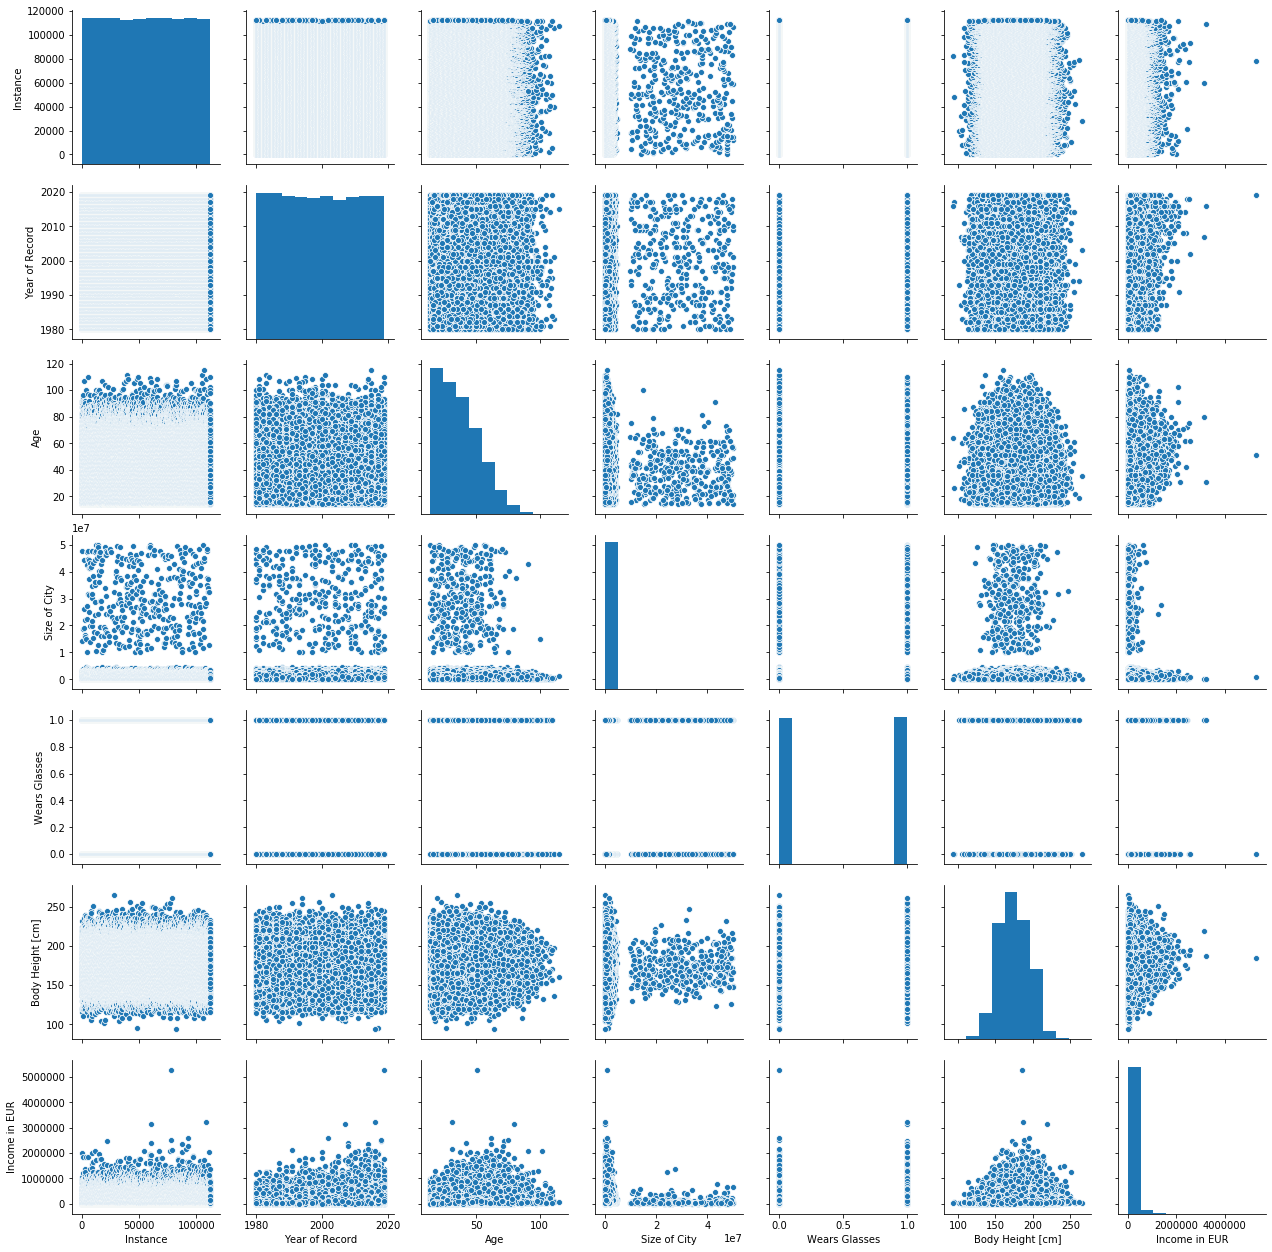

In [12]:
sns.pairplot(new_df)

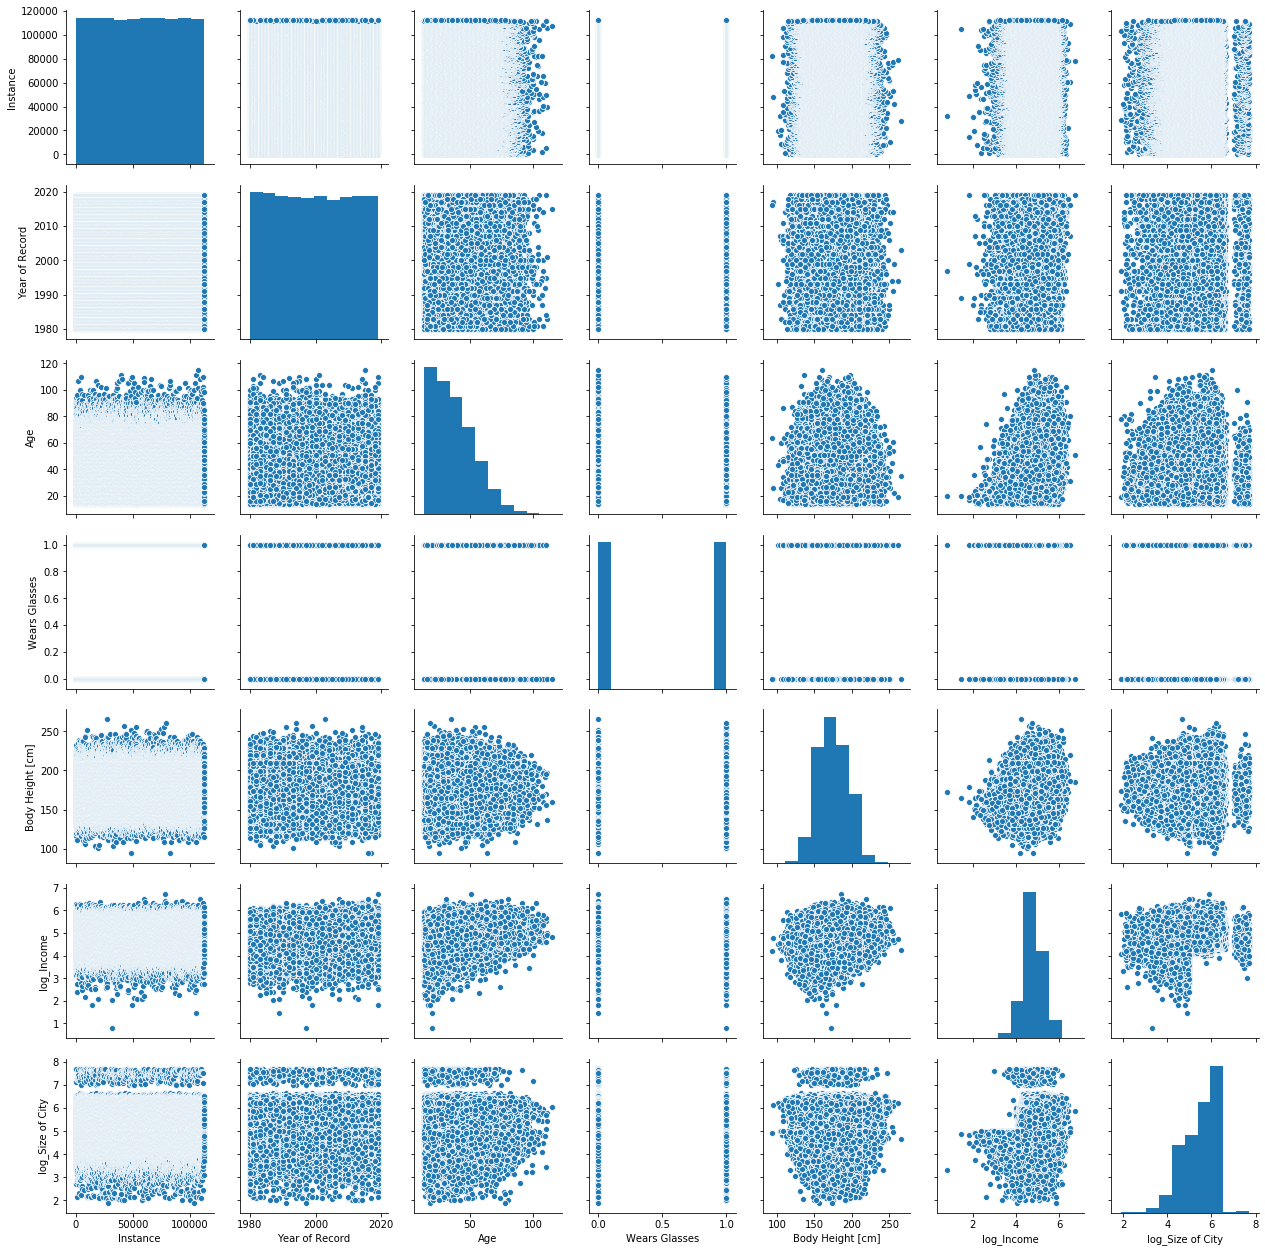

In [13]:
# new_df.head()
new_log_df = new_df.copy(deep=True)
new_log_df.head()
# new_df.head()
new_log_df= new_log_df[new_log_df['Income in EUR']>0]
new_log_df['log_Income']= np.log10(new_log_df['Income in EUR'])
new_log_df['log_Size of City'] = np.log10(new_log_df['Size of City'])
new_log_df = new_log_df.drop(columns = ['Income in EUR', 'Size of City'])
new_log_df.head()
sns.pairplot(new_log_df)

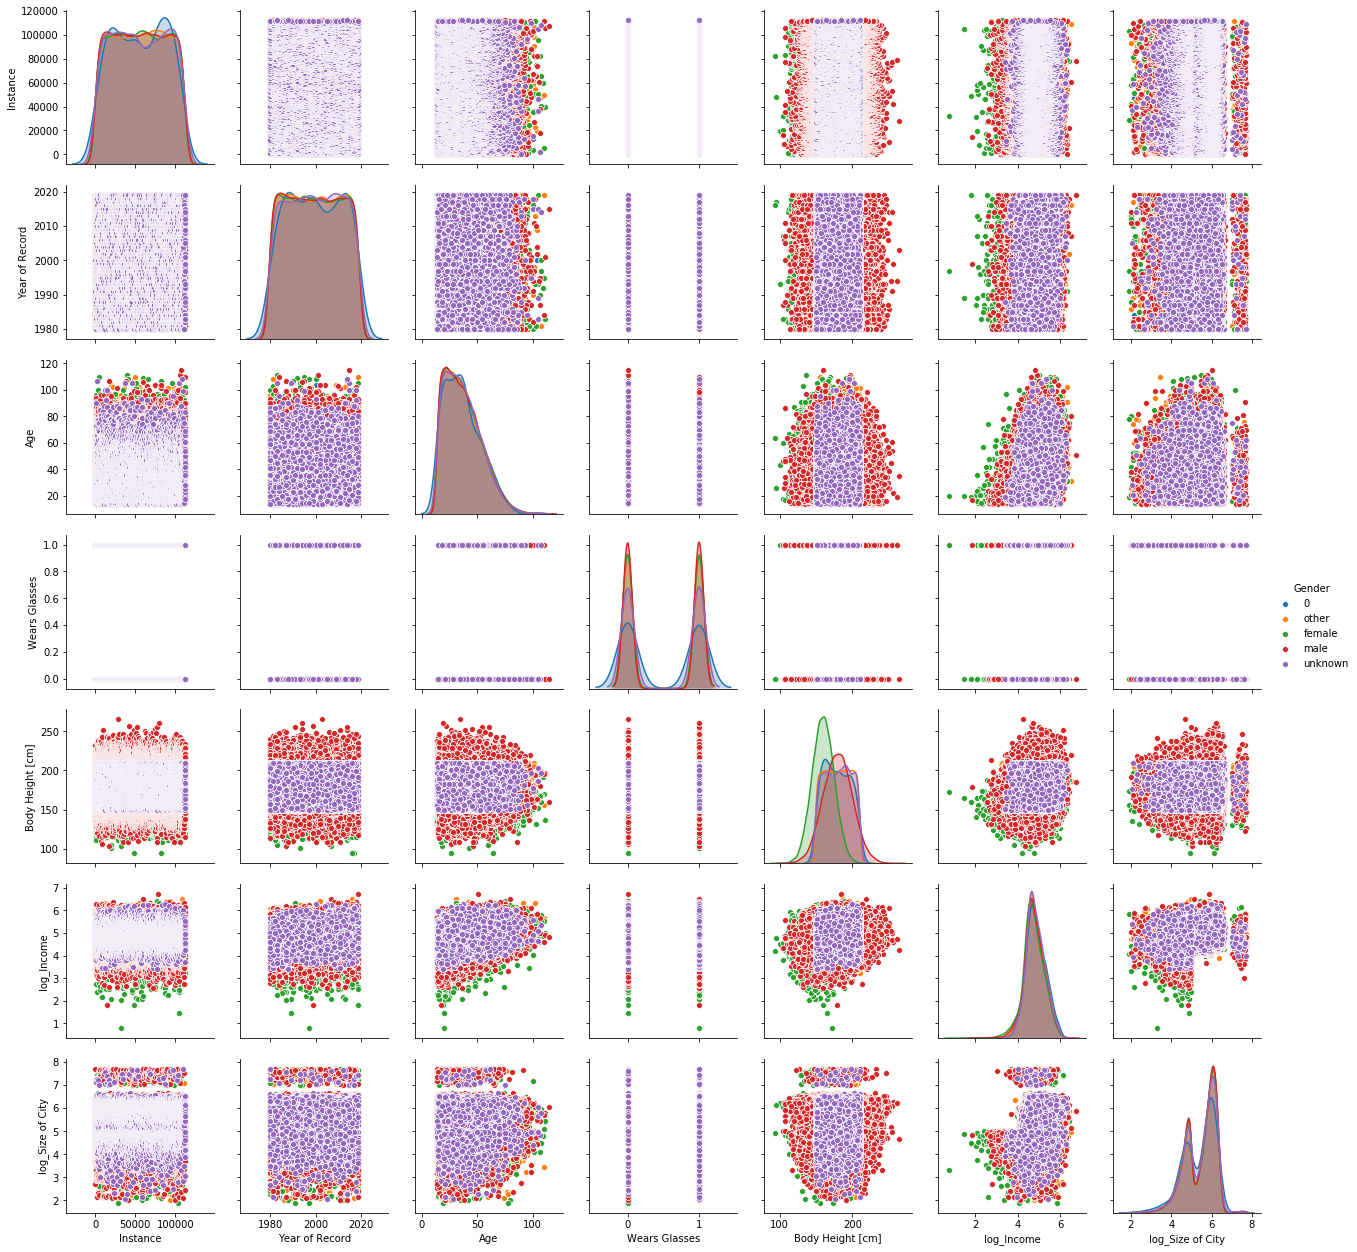

In [14]:
sns.pairplot(new_log_df,hue = 'Gender')

C:\Users\Ankit\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Ankit\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


array([0, 1], dtype=int64)

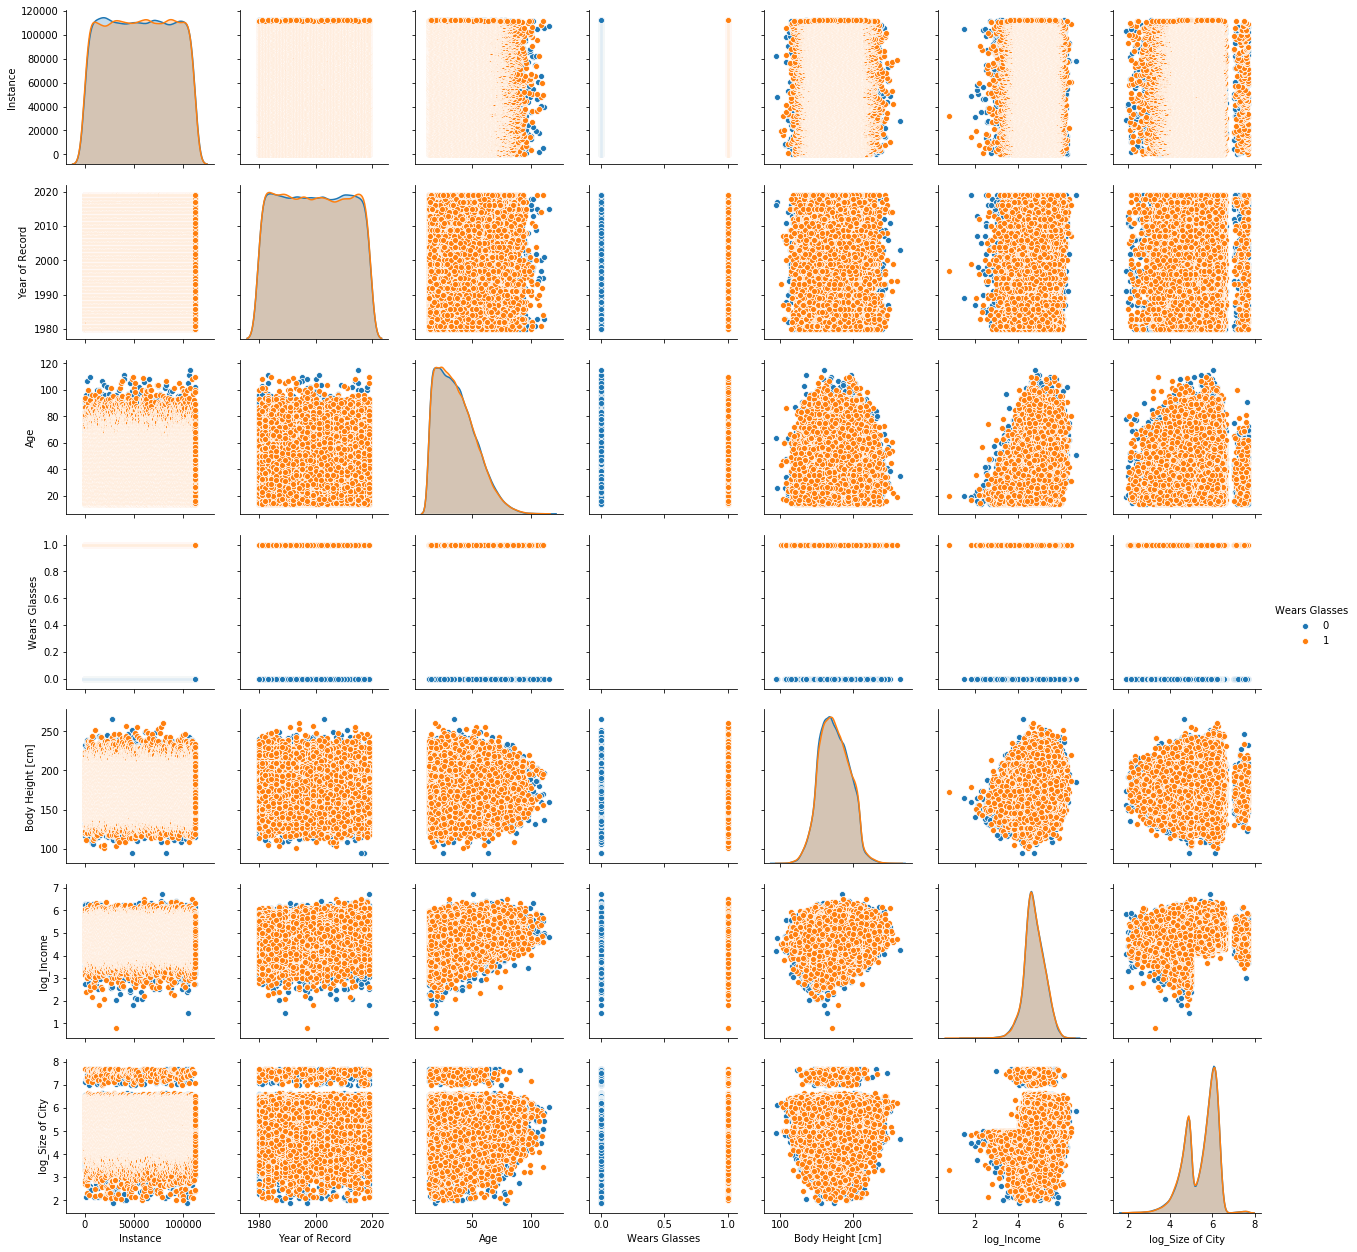

In [15]:
sns.pairplot(new_log_df,hue = 'Wears Glasses')
new_log_df['Wears Glasses'].unique()

In [16]:
new_log_df['Wears Glasses'].value_counts()

1    45214
0    45095
Name: Wears Glasses, dtype: int64

In [17]:
# sns.pairplot(new_log_df,hue = 'Gender')
new_log_df=new_log_df[new_log_df['University Degree']!='0']
sns.pairplot(new_log_df,hue = 'Year of Record')

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001772200AC80> (for post_execute):


KeyboardInterrupt: 

In [ ]:
pip install pandas_profiling

In [ ]:
import pandas_profiling
import pandas as pd
pd.read_csv('tcd ml 2019-20 income prediction training (with labels).csv').profile_report()

In [ ]:
df1=pd.read_csv('tcd ml 2019-20 income prediction training (with labels).csv')
df1.head()
df1.describe()
df1.info()

In [447]:
#Correlation
df1=pd.read_csv('tcd ml 2019-20 income prediction training (with labels).csv')
print(((np.log10(df1['Size of City']))**2).corr(np.log10(df1['Income in EUR'])))

0.22513854147293744


C:\Users\Ankit\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


In [409]:
df=pd.read_csv('tcd ml 2019-20 income prediction training (with labels).csv')
def fillDegree(x):
    return (df[df['Country']==x]['University Degree'].mode()[0])
def fillGender(x):
    return (df[df['Country']==x]['Gender'].mode()[0])
# df[df['Year of Record'].isnull()]
print(df[~(df['Age'].isnull() & df['Year of Record'].isnull())])

        Instance  Year of Record  Gender   Age               Country  \
0              1          1997.0       0  41.0               Belarus   
1              2          1996.0   other  41.0             Singapore   
2              3          2018.0   other  28.0                Norway   
3              4          2006.0   other  33.0                  Cuba   
4              5          2010.0  female  46.0  United Arab Emirates   
5              6          1991.0    male  60.0               Liberia   
6              7          1982.0     NaN  71.0    State of Palestine   
7              8          2008.0    male  36.0                Israel   
8              9          2015.0    male  43.0           South Sudan   
9             10          2019.0  female  16.0                  Cuba   
10            11          1981.0    male  51.0            Kyrgyzstan   
11            12          1989.0   other  15.0                  Togo   
12            13          1997.0     NaN  22.0               Fin

In [463]:
def featureEngineering(path):
    df=pd.read_csv(path)
    from sklearn.preprocessing import StandardScaler
    df['Size of City'] = df.groupby("Country")['Size of City'].apply(lambda x: x.fillna(x.mean()))
    df['Size of City'] = np.log10(df['Size of City'])
#     df['Size of City'] = df['Size of City']**3
#     df['Year of Record'] = df.groupby("Age")['Year of Record'].apply(lambda x: x.fillna(x.mode()[0]))
    df['Year of Record'].fillna(df['Year of Record'].min(),inplace=True)
    df['Profession'].fillna('9999',inplace=True)
    df['University Degree'].fillna(df['University Degree'].mode(),inplace=True)
    df['Gender'].fillna(df['Gender'].mode(), inplace=True)
    if 'Income in EUR' in df.columns:
        df = df[df['Income in EUR']>0]
        df['Income in EUR'] = np.log10(df['Income in EUR'])
        df = df[~df['Income in EUR'].isin(detect_outlier(df['Income in EUR']))] #Removing outliers
#         df = df[~df['Size of City'].isin(detect_outlier(df['Size of City']))]
#         df = df[~df['Body Height [cm]'].isin(detect_outlier(df['Body Height [cm]']))]
#         df = df[df['Age']<=100]
        df2= df[['Age','Income in EUR','Size of City','Body Height [cm]','Country','Year of Record','Profession','University Degree']]
    else:
        df2= df[['Age','Size of City','Body Height [cm]','Country','Year of Record','Profession','University Degree']]
#     df2 = df2[df2['Age']<=84]
    df2['Age'].fillna(df2['Age'].mean(), inplace = True)
    df2 = pd.get_dummies(data=df2, columns=['Country','Year of Record','Profession','University Degree'])
    df2['Age'].fillna(df2['Age'].mean(), inplace = True)
    
    return df2

In [199]:

# df2 = df2[df2['Income in EUR']>0]
# df2['Income in EUR'] = np.log10(df2['Income in EUR'])


# df=pd.read_csv('tcd ml 2019-20 income prediction training (with labels).csv')
# # print(fillDegree('Spain'))
# # print(fillGender('Spain'))
# from sklearn.preprocessing import StandardScaler
# # df.info()
# # df['Profession'].dropna(inplace=True)
# #df = df.dropna(subset=['Profession','University Degree','Year of Record','Gender'])
# # df = df[df['Profession'].notnull()]
# # df = df[df['Year of Record'].notnull()]
# df['Size of City'] = np.log10(df['Size of City'])
# # df['Size of City'] = (df['Size of City']-df['Size of City'].min())/df['Size of City'].max()
# # df['Income in EUR'] = np.log10(df['Income in EUR'])
# # df['Income in EUR'] = (df['Income in EUR']-df['Income in EUR'].min())/df['Income in EUR'].max()
# # df['Year of Record'].fillna(df['Year of Record'].mode(),inplace=True)
# df['Year of Record'] = df.groupby("Age")['Year of Record'].apply(lambda x: x.fillna(x.mode()[0]))
# df['Profession'].fillna('9999',inplace=True)
# # df['Profession'] = df.groupby(["Country")['Profession'].apply(lambda x: x.fillna(x.mode()[0]))
# df['University Degree'].fillna(df['University Degree'].mode(),inplace=True)
# # df['University Degree'] = df.groupby("Country")['University Degree'].apply(lambda x: x.fillna(x.mode()[0]))
# # df['Gender'] = df.groupby("Country")['Gender'].apply(lambda x: x.fillna(x.mode()[0]))
# df['Gender'].fillna(df['Gender'].mode(), inplace=True)
# # df['Hair Color'].fillna(df['Hair Color'].mode(), inplace=True)
# # df['Hair Color'] = df.groupby("Country")['Hair Color'].apply(lambda x: x.fillna(x.mode()[0]))
# # print(df['Year of Record'].value_counts())
# #print(df['Gender'].unique())
# df = df[df['Income in EUR']>0]
# df['Income in EUR'] = np.log10(df['Income in EUR'])
# # df2 = df[['Age','Country','Size of City','Body Height [cm]','Income in EUR','Wears Glasses','Profession','Year of Record','Gender','University Degree']]
# df2= df[['Age','Income in EUR','Size of City','Body Height [cm]','Country','Year of Record','Profession','University Degree']]
# df2['Age'].fillna(df2['Age'].mean(), inplace = True)
# # df2['Age'] = (df2['Age']-df2['Age'].min())/df2['Age'].max()
# # df2['Year of Record'].unique()

# # df2.info()
# # df2 = pd.get_dummies(data=df2, columns=['Country','Wears Glasses','Profession','Year of Record','Gender','University Degree'])
# df2 = pd.get_dummies(data=df2, columns=['Country','Year of Record','Profession','University Degree'])
# # df2[['Size of City', 'Age', 'Body Height [cm]']] = StandardScaler().fit_transform(df[['Size of City', 'Age', 'Body Height [cm]']])
# # df2[['Size of City']] = StandardScaler().fit_transform(df[['Size of City']])
# df2['Age'].fillna(df2['Age'].mean(), inplace = True)
# # df2['Body Height'] = np.log10(df2['Body Height [cm]'])
# # df2.drop(['Body Height [cm]'],axis=1,inplace =True)
# # df2['Age'].unique()
# #df2.profile_report()
# # df2[df2==np.inf]


# # df2['Gender_9999'].head()

In [464]:
df2 = featureEngineering('tcd ml 2019-20 income prediction training (with labels).csv')
X = df2.loc[:, df2.columns != 'Income in EUR']
print(X.shape)
y = df2['Income in EUR']
# X.head()
# y.head()
# df2['Age'].unique()
df3 = featureEngineering('tcd ml 2019-20 income prediction test (without labels).csv')
for x in list(X.columns.difference(df3.columns)):
    df3[x]= 0
print(df3.head())

for x in list(df3.columns.difference(X.columns)):
    X[x]= 0
print(X.head())
df3= df3[X.columns]
print(df3.head())

C:\Users\Ankit\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


(110692, 1546)
    Age  Size of City  Body Height [cm]  Country_Afghanistan  Country_Albania  \
0  21.0      5.592900               153                    0                0   
1  34.0      4.527024               163                    0                0   
2  53.0      4.541142               153                    0                0   
3  29.0      6.174389               154                    0                0   
4  17.0      5.081567               191                    0                0   

   Country_Algeria  Country_Angola  Country_Armenia  Country_Australia  \
0                0               0                0                  0   
1                0               0                0                  0   
2                0               0                0                  0   
3                0               0                0                  0   
4                0               0                0                  0   

   Country_Austria  ...  Profession_biological scient

In [465]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
# print(y_test.head())
from sklearn.linear_model import LinearRegression

# poly = PolynomialFeatures(degree=4)
# X_train_poly = poly.fit_transform(X_train)
# X_test_poly = poly.fit_transform(X_test)
# df3_poly = poly.fit_transform(df3)

# lm = LinearRegression()
# lm.fit(X_train,y_train)
# predictions = lm.predict(X_test)
# # predictions = 10**predictions
# ee = pd.read_csv('faulty result.csv')
# cc = pd.DataFrame(data=10**predictions,
#             columns=['Income'])
# dd = pd.read_csv('tcd ml 2019-20 income prediction test (without labels).csv')
# dd = dd[['Instance']]
# # print(dd.head())
# result = pd.concat([dd, cc], axis=1)
# print(result.head())

# # print(predictions.shape)
# print(predictions)


# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 10, random_state = 42)
# Train the model on training data
rf.fit(X_train,y_train);
predictions = rf.predict(X_test)


# predictions = (10 ** predictions)
# print(y_test)

# import xgboost as xgb
# xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
#                 max_depth = 5, alpha = 10, n_estimators = 10)
# xg_reg.fit(X_train,y_train)
# predictions = xg_reg.predict(X_test) 

# xgdmat=xgb.DMatrix(X_train,y_train)
# our_params={'eta':0.1,'seed':0,'subsample':0.8,'colsample_bytree':0.8,'objective':'reg:linear','max_depth':3,'min_child_weight':1}
# final_gb=xgb.train(our_params,xgdmat)
# tesdmat=xgb.DMatrix(X_test)
# predictions=final_gb.predict(tesdmat)
# print(y_pred)
# 
# plt.scatter(y_test,predictions)
# np.isfinite(predictions)
# print(np.isinf(predictions).any())
# print(np.amax(predictions))
# print(np.where(predictions == np.amax(predictions)))
# print(np.median(predictions))
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(10**y_test, 10**predictions)))
# print('RMSE:', np.sqrt(metrics.mean_squared_error(ee["Income"], 10**predictions)))

RMSE: 86039.71919999908


In [385]:
result.to_csv('tcd ml 2019-20 income prediction submission file.csv', encoding='utf-8', index=False)
print(result.head())

   Instance         Income
0    111994   27502.929131
1    111995   14680.076915
2    111996   33474.287708
3    111997  129355.173531
4    111998   16020.062843


In [329]:
print(ee.head())
ee.to_csv('faulty result.csv', encoding='utf-8', index=False)

   Instance         Income
0    111994  418635.328873
1    111995  719339.510897
2    111996  428734.330240
3    111997   29336.597631
4    111998   19962.148505


PermissionError: [Errno 13] Permission denied: 'faulty result.csv'

   Instance  Year of Record  Gender   Age               Country  Size of City  \
0         1          1997.0       0  41.0               Belarus      6.093397   
1         2          1996.0   other  41.0             Singapore      6.205070   
2         3          2018.0   other  28.0                Norway      6.113280   
3         4          2006.0   other  33.0                  Cuba      5.876162   
4         5          2010.0  female  46.0  United Arab Emirates      4.979498   

                     Profession University Degree  Wears Glasses Hair Color  \
0                 steel workers          Bachelor              0      Blond   
1        safe event coordinator            Master              0      Black   
2  receivables/payables analyst               PhD              1      Brown   
3               fleet assistant                No              1      Black   
4                  lead trainer                 0              0      Blond   

   Body Height [cm]  Income in EUR  
0

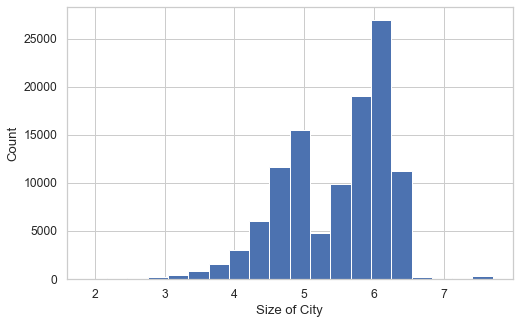

In [457]:
df=pd.read_csv('tcd ml 2019-20 income prediction training (with labels).csv')
# df['Income in EUR'] = (df[df['Income in EUR']>0])
df = df[df['Income in EUR']>0]
df['Size of City'] = np.log10(df['Size of City'])
# df = df[~df['Size of City'].isin(detect_outlier(df['Size of City']))]
print(df.head())
# df['Income in EUR'] = np.log10(df['Income in EUR'])
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    (df['Size of City']), norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Size of City', ylabel='Count');

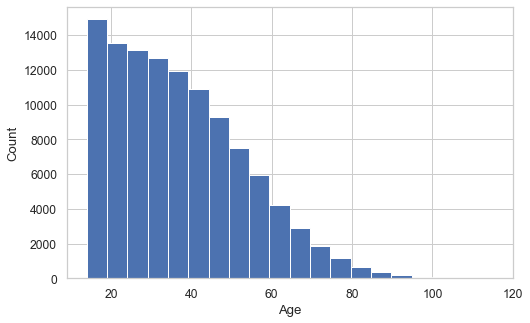

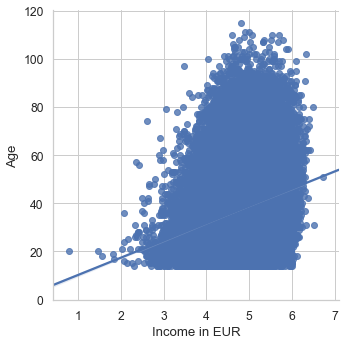

In [286]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    (df['Age']), norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Age', ylabel='Count');
df['Age'].unique()

sns.lmplot(x='Income in EUR',y='Age',data=df)

In [370]:
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers
print(df.head())
print(len(detect_outlier(df['Body Height [cm]'])))
# print(df['Income in EUR'].shape)
# df = df[~df['Income in EUR'].isin(detect_outlier(df['Income in EUR']))]
# print(df['Income in EUR'].shape)

        Instance  Year of Record  Gender   Age       Country  Size of City  \
4195        4196          2010.0  female  35.0      Bulgaria         84598   
70954      70955          1982.0  female  34.0  Sierra Leone         97288   
103244    103245          1992.0  female  21.0       Belarus         88350   
14130      14131          2018.0    male  14.0   Switzerland         27359   
100475    100476          1981.0  female  19.0  Sierra Leone          7473   

                             Profession University Degree  Wears Glasses  \
4195     equipment training coordinator            Master              1   
70954   remote learning team specialist            Master              0   
103244                  field inspector          Bachelor              1   
14130                      loan officer                No              1   
100475                medical assistant            Master              0   

       Hair Color  Body Height [cm]  Income in EUR  
4195        Black    

In [319]:
df['Income in EUR'].dropna(inplace=True)
# print(df['Age'])
a = list(df['Income in EUR'])
df = df.sort_values(by ='Income in EUR' )
# print(df['Age'])
q1, q3= np.percentile(df['Income in EUR'],[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
print (lower_bound)
print (upper_bound)

3.5708548192546554
6.019967813406563
